In [468]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


# Unemployment Analysis in India: Impact of COVID-19 Using Python

## Project Summary

Unemployment is one of the most important indicators of economic stability.

This project analyzes India’s unemployment trends using Python, focusing on the impact of the COVID-19 pandemic. The dataset contains monthly unemployment statistics across Indian states before and during COVID-19.

The analysis includes data cleaning, exploratory data analysis (EDA), distribution analysis, and time-series visualization. Special attention is given to understanding how unemployment levels changed during the lockdown period and whether recovery occurred post-COVID.

The insights from this project can help policymakers understand labor-market vulnerability during economic shocks and design better employment support strategies.

## Objectives

- Analyze unemployment rate data representing unemployed people percentage. 
- Use Python for data cleaning, exploration, and visualization of unemployment trends. 
- Investigate the impact of Covid-19 on unemployment rates. 
- Identify key patterns or seasonal trends in the data. 
- Present insights that could inform economic or social policies

#### In this notebook, all lines need to be run; otherwise, you'll face the issues

In [469]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')
df2 = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')


In [470]:
df1.head()
# df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [471]:
df1.tail()
# df2.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
df1.shape
# df2.shape

(768, 7)

In [473]:
df1.info()
# df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [474]:
df1.describe()
# df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [475]:
df1.isnull().sum()
# df2.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

As of applied stepson df1 & In dataframe df2, have no null values so I have not written the code on dropping all NaN rows and stripping whitespace.

In [476]:
df1 = df1.dropna(how='all')                  
df1.columns = [col.strip() for col in df1.columns]
df1['Date'] = df1['Date'].str.strip()

In [477]:
df2 = df2.dropna(how='all')                  
df2.columns = [col.strip() for col in df2.columns]
df2['Date'] = df2['Date'].str.strip()

In [478]:
df1['Date_obj'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y', errors='coerce')
df2['Date_obj'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y', errors='coerce') 

In [479]:
# Fill with the most frequent date
df1['Date_obj'] = df1['Date_obj'].fillna(df1['Date_obj'].mode()[0])

In [480]:
df1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
Date_obj                                   0
dtype: int64

In [481]:
df1.describe().style.background_gradient(cmap='viridis')

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date_obj
count,740.000000,740.000000,740.000000,740
mean,11.787946,7204460.025676,42.630122,2019-12-12 18:36:58.378378496
min,0.000000,49420.000000,13.330000,2019-05-31 00:00:00
25%,4.657500,1190404.500000,38.062500,2019-08-31 00:00:00
50%,8.350000,4744178.500000,41.160000,2019-11-30 00:00:00
75%,15.887500,11275489.500000,45.505000,2020-03-31 00:00:00
max,76.740000,45777509.000000,72.570000,2020-06-30 00:00:00
std,10.721298,8087988.429458,8.111094,nan


In [482]:
df2['Region'].nunique()

27

In [483]:
df2.describe().style.background_gradient(cmap='viridis')

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Date_obj
count,267.000000,267.000000,267.000000,267.000000,267.000000,267
mean,12.236929,13962105.722846,41.681573,22.826048,80.532425,2020-06-16 09:15:30.337078528
min,0.500000,117542.000000,16.770000,10.850500,71.192400,2020-01-31 00:00:00
25%,4.845000,2838930.500000,37.265000,18.112400,76.085600,2020-03-31 00:00:00
50%,9.650000,9732417.000000,40.390000,23.610200,79.019300,2020-06-30 00:00:00
75%,16.755000,21878686.000000,44.055000,27.278400,85.279900,2020-08-31 00:00:00
max,75.850000,59433759.000000,69.690000,33.778200,92.937600,2020-10-31 00:00:00
std,10.803283,13366318.359733,7.845419,6.270731,5.831738,nan


In [484]:
# df1.duplicated().any()
df2.duplicated().any()

False

Basic Calculations: We can compute number of unemployed from the unemployment rate and employed count. If unemployment rate (%) = r, and Estimated Employed = E, then the labor force is E + U, where U = number unemployed. Since r = U/(E+U)*100, we solve:

U = E × (r  /  100-r)


In [485]:
df2['Unemployed'] = df2['Estimated Employed'] * (df2['Estimated Unemployment Rate (%)'] 
                                               / (100 - df2['Estimated Unemployment Rate (%)']))


In [486]:
mean_rate = df2.groupby('Date_obj')['Estimated Unemployment Rate (%)'].mean()
print(mean_rate)

Date_obj
2020-01-31     9.196538
2020-02-29     9.266154
2020-03-31    10.782593
2020-04-30    22.236154
2020-05-31    23.244444
2020-06-30    10.911111
2020-07-31     9.834444
2020-08-31    10.313333
2020-09-30     8.705926
2020-10-31     8.026296
Name: Estimated Unemployment Rate (%), dtype: float64


In [487]:
apr = df2[df2['Date_obj'] == pd.Timestamp('2020-04-30')]
print(apr.sort_values('Estimated Unemployment Rate (%)', ascending=False)[['Region','Estimated Unemployment Rate (%)']].head())


         Region  Estimated Unemployment Rate (%)
172  Puducherry                            75.85
210  Tamil Nadu                            49.83
102   Jharkhand                            47.09
23        Bihar                            46.64
73      Haryana                            43.22


As found in news reports and analyses, Puducherry and Jharkhand saw very high rates in April 2020 (~76% and ~47% respectively)

In [488]:
df2[['Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)']].corr()

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.00000,-0.07354
Estimated Labour Participation Rate (%),-0.07354,1.00000


## Data Visualization and Trend Analysis

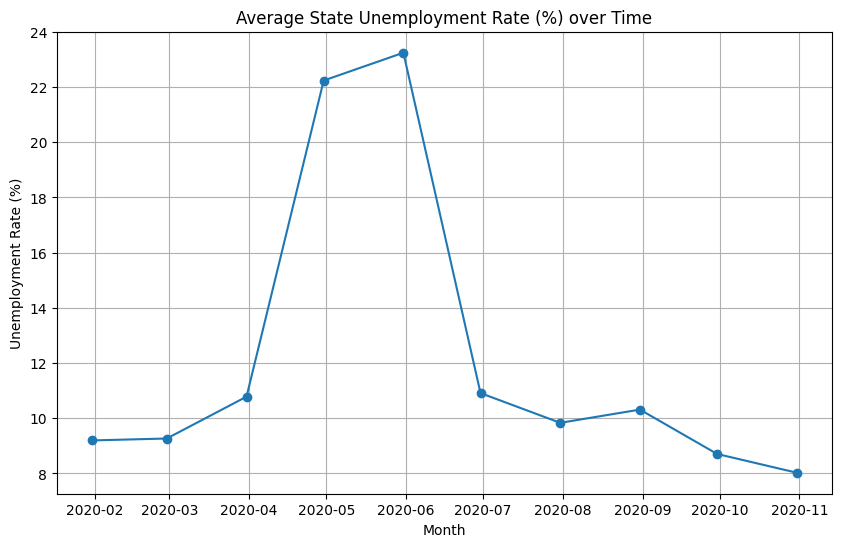

In [489]:
plt.figure(figsize=(10,6))
plt.plot(mean_rate.index, mean_rate.values, marker='o')
plt.title('Average State Unemployment Rate (%) over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


<Axes: xlabel='Region', ylabel='Estimated Unemployment Rate (%)'>

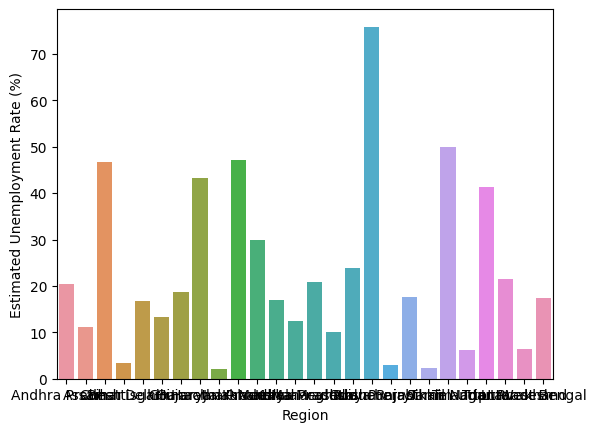

In [490]:
sns.barplot(x=apr['Region'], y=apr['Estimated Unemployment Rate (%)'])


In [491]:
monthly_unemployed = df2.groupby('Date_obj')['Unemployed'].sum()
print(monthly_unemployed)


Date_obj
2020-01-31    3.165701e+07
2020-02-29    3.391911e+07
2020-03-31    3.766877e+07
2020-04-30    8.653584e+07
2020-05-31    8.675898e+07
2020-06-30    4.265156e+07
2020-07-31    3.123361e+07
2020-08-31    3.555732e+07
2020-09-30    2.832579e+07
2020-10-31    2.966959e+07
Name: Unemployed, dtype: float64


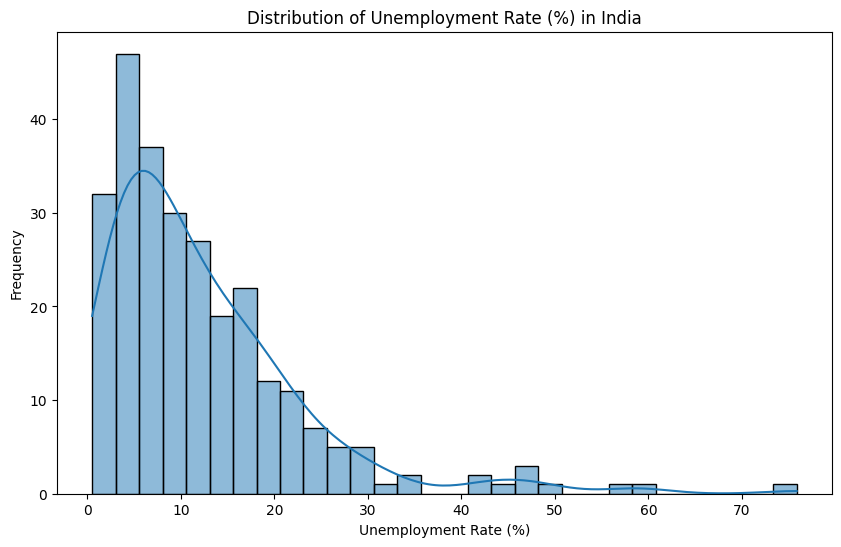

In [492]:
plt.figure(figsize=(10,6))
sns.histplot(df2['Estimated Unemployment Rate (%)'], bins=30, kde=True)

plt.title("Distribution of Unemployment Rate (%) in India")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

Most unemployment rates lie between ~ 5%–15%

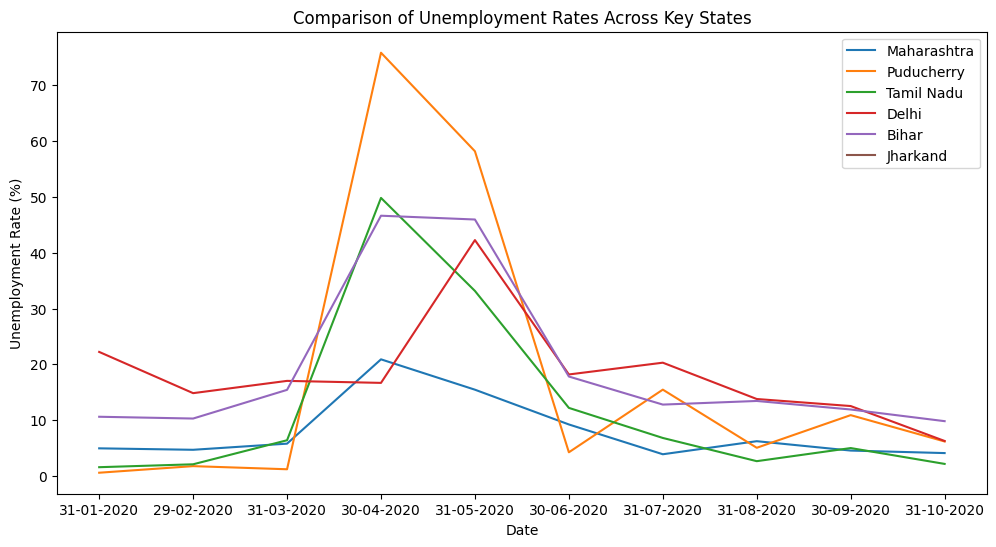

In [493]:
states_to_plot = ['Maharashtra', 'Puducherry', 'Tamil Nadu', 'Delhi', 'Bihar', 'Jharkand']
df_subset = df2[df2['Region'].isin(states_to_plot)]

plt.figure(figsize=(12,6))
for state in states_to_plot:
    state_data = df_subset[df_subset['Region'] == state]
    plt.plot(state_data['Date'], state_data['Estimated Unemployment Rate (%)'], label=state)

plt.title("Comparison of Unemployment Rates Across Key States")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()